In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
df = pd.read_csv("water_usage_prediction.csv")
df.head()

,State,Year,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Water Usage (billion liters),Domestic Water Usage (billion liters),Total Water Consumption (billion liters)
0,Himachal Pradesh,2014,62.06,2335.9,27858.7,217.78,173.96,391.74
1,Maharashtra,2023,161.10,2896.7,4921.7,283.42,169.84,453.26
2,Tamil Nadu,2003,249.33,653.0,29305.3,257.51,257.38,514.89
3,Haryana,2016,37.34,972.3,71026.8,204.25,218.42,422.67
4,Chhattisgarh,2006,152.04,825.5,174406.8,281.18,27.66,308.84


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   State                                     5000 non-null   object 
 1   Year                                      5000 non-null   int64  
 2   Population (millions)                     5000 non-null   float64
 3   Annual Rainfall (mm)                      5000 non-null   float64
 4   Agricultural Land (sq km)                 5000 non-null   float64
 5   Industrial Water Usage (billion liters)   5000 non-null   float64
 6   Domestic Water Usage (billion liters)     5000 non-null   float64
 7   Total Water Consumption (billion liters)  5000 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 312.6+ KB


In [4]:
df.describe()

,Year,Population (millions),Annual Rainfall (mm),Agricultural Land (sq km),Industrial Water Usage (billion liters),Domestic Water Usage (billion liters),Total Water Consumption (billion liters)
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2012.497400,125.70539,2248.314020,98955.694280,247.421504,149.555980,396.977484
std,7.508533,70.94088,1020.926499,57509.336193,145.108072,86.244363,168.687823
min,2000.000000,2.04000,501.600000,1062.500000,1.030000,0.530000,6.940000
25%,2006.000000,64.14750,1353.675000,49401.775000,121.175000,74.075000,267.460000
50%,2013.000000,125.49500,2243.900000,97318.700000,242.260000,147.990000,401.255000
75%,2019.000000,186.79250,3129.800000,149180.925000,374.270000,224.432500,524.955000
max,2025.000000,249.89000,3999.600000,199992.000000,499.930000,299.980000,794.560000


In [5]:
df.isnull().sum()

,0
State,0
Year,0
Population (millions),0
Annual Rainfall (mm),0
Agricultural Land (sq km),0
Industrial Water Usage (billion liters),0
Domestic Water Usage (billion liters),0
Total Water Consumption (billion liters),0


[]

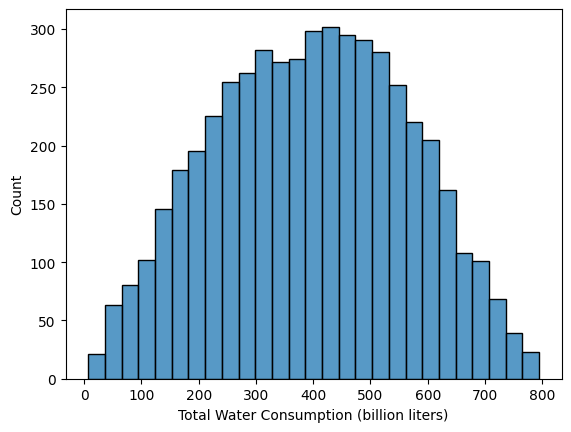

In [20]:
sns.histplot(df["Total Water Consumption (billion liters)"])
plt.plot()

In [6]:
# Step 2: Preprocess Data
# Encode categorical column 'State'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [7]:
# Drop Year column as it is not needed
df.drop(columns=["Year"],inplace=True)


In [9]:
# Step 3: Split features and target variable
from sklearn.model_selection import train_test_split
x = df.drop(columns=["Total Water Consumption (billion liters)"])  # Features
y = df["Total Water Consumption (billion liters)"]  # Target variable

In [10]:
# Step 4: Split data into training and testing sets (80% train, 20% test)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)



In [11]:
# Step 5: Normalize the data to improve model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)




In [12]:
# Step 6: Train the Linear Regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)



LinearRegression()

In [13]:
# Step 7: Make predictions
ypred = model.predict(xtest)



In [14]:
# Step 8: Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 7.183587058534612e-14
Mean Squared Error: 8.661036407053565e-27
R-squared Score: 1.0
